<a href="https://colab.research.google.com/github/RobertHustayhungry/Data-Mining/blob/main/Data_Mining_Analysis_of_national_dependency_ratio_and_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'


--2024-06-19 08:04:12--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2024-06-19 08:04:12--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-06-19 08:04:13 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)

# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format

# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)

# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

# 隨機種子
random_seed = 183

In [ ]:
url = "/content/drive/MyDrive/merge.csv"

df = pd.read_csv(url)

In [ ]:
df2 = df.drop(['Persons per hundred persons aged 15-64 Footnote', 'Persons per hundred persons aged 15-64 Missing value',
               'Period', 'Economy_y', 'Annual average growth rate', 'Annual average growth rate Footnote',
               'Annual average growth rate Missing value'], axis=1)
df2.to_csv('/content/drive/MyDrive/merge2.csv')

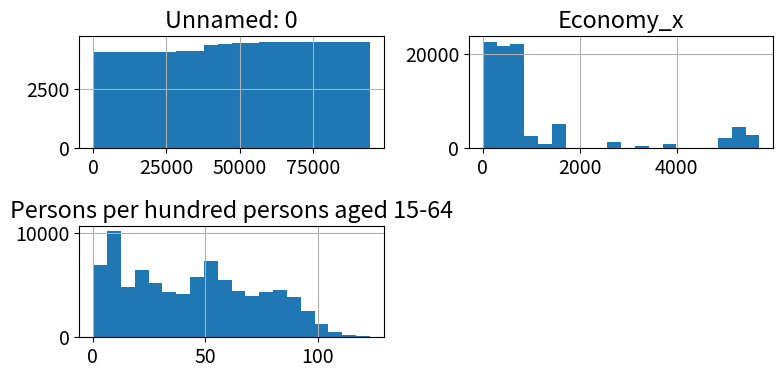

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/merge2.csv')
df2 = df.dropna(how='any')
df3 = df2.drop(['Series', 'Year','Series Label', 'Economy Label'], axis=1)
from pylab import rcParams
rcParams['figure.figsize'] = (8, 4)
df3.hist(bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# 選擇演算法
from sklearn.cluster import KMeans

# 定義群數
clusters=4

# 定義演算法
algorithm = KMeans(n_clusters=clusters,
    random_state=random_seed)

In [ ]:
# 執行訓練與預測
y_pred = algorithm.fit_predict(df3)

# 確認部分結果
print(y_pred[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# 計算各群的平均值
df_cluster = df3.groupby(y_pred).mean()
display(df_cluster)

,Unnamed: 0,Economy_x,Persons per hundred persons aged 15-64
0,59398.5251,1101.6755,39.1954
1,11961.0918,1131.3808,53.1148
2,82736.4223,1101.1716,39.4960
3,36004.1683,1149.6512,47.6871


from matplotlib import pyplot as plt
df_cluster['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_cluster['Economy_x'].plot(kind='hist', bins=20, title='Economy_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_cluster['Persons per hundred persons aged 15-64'].plot(kind='hist', bins=20, title='Persons per hundred persons aged 15-64')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_cluster.plot(kind='scatter', x='Unnamed: 0', y='Economy_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_cluster.plot(kind='scatter', x='Economy_x', y='Persons per hundred persons aged 15-64', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_cluster['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_cluster['Economy_x'].plot(kind='line', figsize=(8, 4), title='Economy_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_cluster['Persons per hundred persons aged 15-64'].plot(kind='line', figsize=(8, 4), title='Persons per hundred persons aged 15-64')
plt.gca().spines[['top', 'right']].set_visible(False)

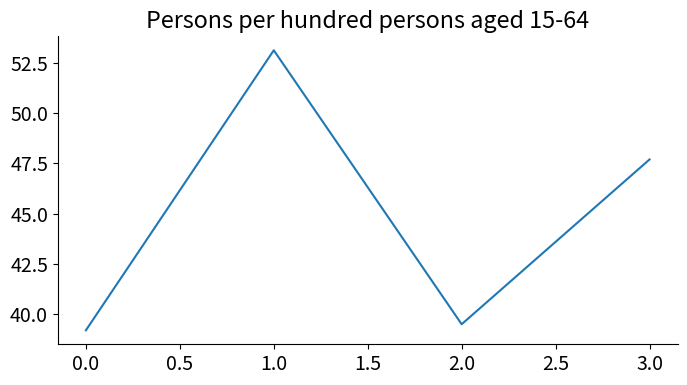

In [ ]:
from matplotlib import pyplot as plt
df_cluster['Persons per hundred persons aged 15-64'].plot(kind='line', figsize=(8, 4), title='Persons per hundred persons aged 15-64')
plt.gca().spines[['top', 'right']].set_visible(False)

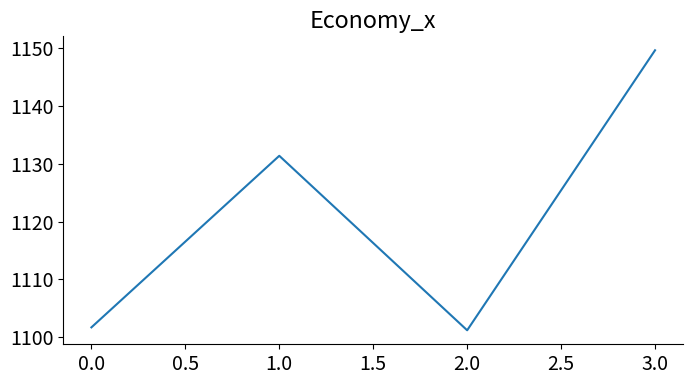

In [ ]:
from matplotlib import pyplot as plt
df_cluster['Economy_x'].plot(kind='line', figsize=(8, 4), title='Economy_x')
plt.gca().spines[['top', 'right']].set_visible(False)

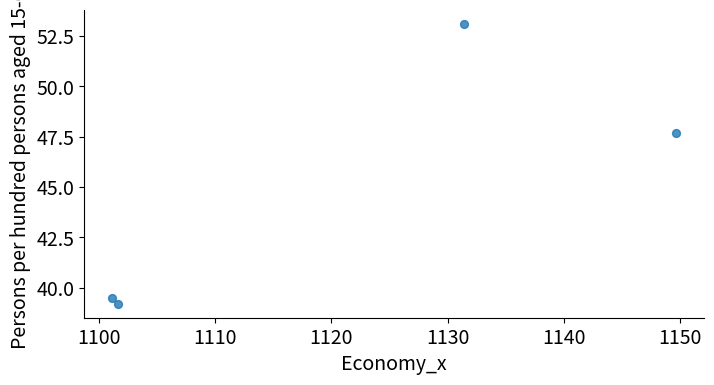

In [ ]:
from matplotlib import pyplot as plt
df_cluster.plot(kind='scatter', x='Economy_x', y='Persons per hundred persons aged 15-64', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

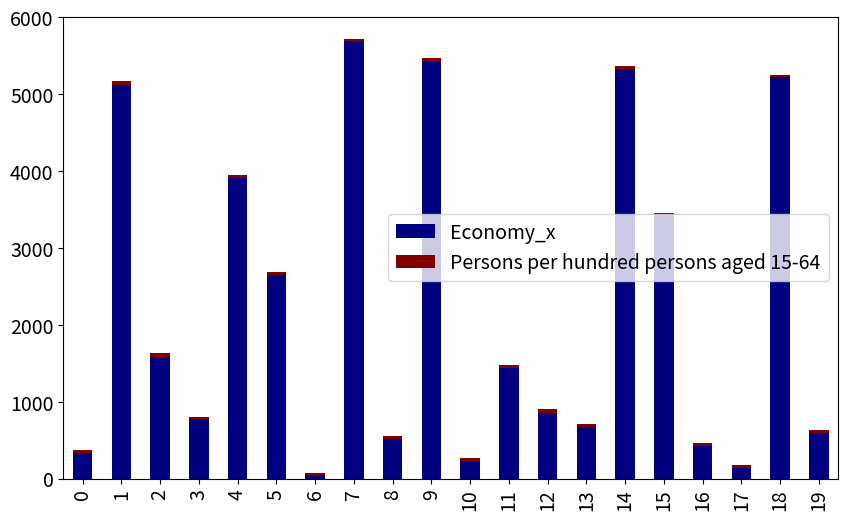

In [ ]:
# 繪製各群的長條圖
df_cluster.plot(kind='bar',stacked=True,
    figsize=(10, 6),colormap='jet')
plt.show()

In [ ]:
#關聯分析

df = pd.read_excel('/content/drive/MyDrive/merge2.xlsx')
print(df.shape[0])

# 確認資料內容
display(df.head())

936


,Series,Series Label,Year,Economy_x,Economy Label,Persons per hundred persons aged 15-64
0,7120,Total dependency ratio,2023,1,Individual economies,NaN
1,7121,Old-age dependency ratio,2023,1,Individual economies,NaN
2,7122,Child dependency ratio,2023,1,Individual economies,NaN
3,7120,Total dependency ratio,2023,4,Afghanistan,82.6160
4,7121,Old-age dependency ratio,2023,4,Afghanistan,4.3740


In [ ]:
df2 = df.dropna(how='any')
print(df2.shape[0])
df3 = df2[df2['Series Label']=='Total dependency ratio']
print(df3.shape[0])
display(df3.head())

897
299


,Series,Series Label,Year,Economy_x,Economy Label,Persons per hundred persons aged 15-64
3,7120,Total dependency ratio,2023,4,Afghanistan,82.6160
6,7120,Total dependency ratio,2023,8,Albania,49.5360
9,7120,Total dependency ratio,2023,12,Algeria,58.8750
12,7120,Total dependency ratio,2023,16,American Samoa,53.2420
15,7120,Total dependency ratio,2023,20,Andorra,38.8270


In [ ]:
w1 = df3.groupby(['Year', 'Economy_x'])['Persons per hundred persons aged 15-64'].sum()
print(w1.head())

Year  Economy_x
2023  0           53.9420
      4           82.6160
      8           49.5360
      12          58.8750
      16          53.2420
Name: Persons per hundred persons aged 15-64, dtype: float64


In [ ]:
w2 = w1.unstack().reset_index().fillna(0).set_index('Year')

# 確認尺寸
print(w2.shape)

# 確認結果
display(w2.head())

(1, 299)


Economy_x,0,4,8,12,16,20,24,28,31,32,36,40,44,48,50,51,52,56,60,64,68,70,72,76,84,90,92,96,100,104,108,112,116,120,124,132,136,140,144,148,152,156,158,170,174,175,178,180,184,188,191,192,196,203,204,208,212,214,218,222,226,231,232,233,234,238,242,246,250,251,254,258,262,266,268,270,275,276,288,292,296,300,304,308,312,316,320,324,328,332,340,344,348,352,356,360,364,368,372,376,380,384,388,392,398,400,404,408,410,414,417,418,422,426,428,430,434,438,440,442,446,450,454,458,462,466,470,474,478,480,484,492,496,498,499,500,504,508,512,516,520,524,528,531,533,534,535,540,548,554,558,562,566,570,579,580,583,584,585,586,591,598,600,604,608,616,620,624,626,630,634,638,642,643,646,652,654,659,660,662,663,666,670,674,678,682,686,688,690,694,702,703,704,705,706,710,716,724,728,729,732,740,748,752,756,757,760,762,764,768,772,776,780,784,788,792,795,796,798,800,804,807,818,826,830,833,834,840,841,842,850,854,858,860,862,876,882,887,894,926,1400,1410,1420,1430,1450,1460,1500,1520,1530,1540,1550,1560,1600,1601,1610,1612,1614,1615,1620,1640,2621,2622,2623,2711,3412,3905,3916,3919,5100,5110,5120,5121,5122,5123,5124,5200,5210,5220,5221,5222,5223,5300,5310,5320,5330,5340,5350,5400,5410,5420,5430,5440,5500,5600,5702,5703,5704,5705,5706
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,53.9420,82.6160,49.5360,58.8750,53.2420,38.8270,90.2340,41.4490,43.9620,53.3590,54.3550,52.8510,38.4530,31.4240,46.6160,51.7230,50.2350,57.3140,55.2300,38.7210,54.7150,50.1320,56.2080,43.2980,48.1610,73.5710,31.8530,39.4930,56.9220,45.8390,90.9960,52.1840,53.0800,80.5190,53.7300,45.9250,33.7750,101.4510,52.2800,97.4660,46.3020,45.0420,42.8870,43.8640,72.5830,87.5950,76.6440,97.6100,55.5060,44.9060,58.0820,46.3570,45.0190,57.6770,82.9430,57.8930,41.2620,52.6780,50.0660,50.1310,70.1860,73.7740,74.4850,59.1590,63.0480,40.6420,52.4140,62.6830,64.0450,64.0310,61.5540,45.7200,52.9900,66.6150,56.4130,81.9020,72.2730,58.0670,67.3710,61.8160,66.1370,58.0970,45.8740,51.8780,62.4620,61.4790,58.2040,80.2470,53.6650,57.2300,51.6390,49.7950,51.8060,51.6210,46.9990,46.8570,45.3230,68.6870,53.0820,66.9810,57.8750,77.0750,37.3230,71.0470,60.8390,54.9930,67.0220,45.0080,42.0730,34.3570,64.0590,53.4700,60.1230,61.4350,60.4520,76.3660,48.5400,52.4300,57.8390,45.0190,40.1760,72.8210,80.4620,43.2750,36.5700,97.2710,48.7650,64.1050,79.7360,41.4770,48.3840,96.2930,58.9800,46.4360,53.4670,43.9610,52.2360,84.7150,42.4670,67.0990,70.6960,53.1750,56.4300,47.7360,48.2970,28.3550,44.8320,49.9990,74.9400,54.4220,53.3550,104.7320,84.3260,69.5140,54.2700,48.0530,57.0300,57.9930,45.6250,68.0410,53.4670,59.2140,53.9750,52.1030,55.3060,50.3180,57.0350,73.8360,64.9300,57.9210,20.9220,56.7870,52.2050,50.9060,70.4650,32.1000,75.3050,42.5010,38.9940,37.4390,49.0670,51.6290,48.5330,49.7360,74.5430,40.1510,79.4460,52.1920,45.9440,71.5080,38.5420,48.3040,46.5060,57.1860,98.4400,51.8630,77.2230,51.9770,84.8600,79.4610,42.8680,50.6010,62.2810,60.8920,53.0660,53.0630,52.4180,65.8800,45.3140,74.8820,56.7290,67.3310,44.3960,20.6010,51.5110,46.8750,57.0850,37.3190,62.4060,85.6890,55.1840,45.0370,60.0850,57.9150,46.3620,58.9430,85.9210,54.4710,54.5030,54.5060,66.6090,84.6980,52.7440,55.0840,55.1640,56.5580,74.8080,71.5860,79.2680,57.8840,53.5680,76.6510,47.7660,48.2050,59.5330,48.2370,55.8350,54.4260,61.5890,55.2580,54.3660,60.4880,56.0460,50.0730,72.9890,53.1520,84.3860,59.7720,73.7930,51.2810,45.5450,52.9210,77.1210,46.1450,56.7080,54.5840,48.4870,53.7810,76.6510,61.0510,80.5170,78.2870,92.3530,53.0290,83.0360,50.1400,54.4260,47.7660,50.1610,49.7730,46.7420,48.6830,58.7670,49.8660,46.6130,51.7740,47.9180,55.2580,51.7820,58.0330,54.9310,59.3120,55.9070,48.7480,54.9750,50.1790,46.9920,56.0060,54.9580


In [ ]:
basket_df = w2.apply(lambda x: x>50)
display(basket_df.head())

Economy_x,0,4,8,12,16,20,24,28,31,32,36,40,44,48,50,51,52,56,60,64,68,70,72,76,84,90,92,96,100,104,108,112,116,120,124,132,136,140,144,148,152,156,158,170,174,175,178,180,184,188,191,192,196,203,204,208,212,214,218,222,226,231,232,233,234,238,242,246,250,251,254,258,262,266,268,270,275,276,288,292,296,300,304,308,312,316,320,324,328,332,340,344,348,352,356,360,364,368,372,376,380,384,388,392,398,400,404,408,410,414,417,418,422,426,428,430,434,438,440,442,446,450,454,458,462,466,470,474,478,480,484,492,496,498,499,500,504,508,512,516,520,524,528,531,533,534,535,540,548,554,558,562,566,570,579,580,583,584,585,586,591,598,600,604,608,616,620,624,626,630,634,638,642,643,646,652,654,659,660,662,663,666,670,674,678,682,686,688,690,694,702,703,704,705,706,710,716,724,728,729,732,740,748,752,756,757,760,762,764,768,772,776,780,784,788,792,795,796,798,800,804,807,818,826,830,833,834,840,841,842,850,854,858,860,862,876,882,887,894,926,1400,1410,1420,1430,1450,1460,1500,1520,1530,1540,1550,1560,1600,1601,1610,1612,1614,1615,1620,1640,2621,2622,2623,2711,3412,3905,3916,3919,5100,5110,5120,5121,5122,5123,5124,5200,5210,5220,5221,5222,5223,5300,5310,5320,5330,5340,5350,5400,5410,5420,5430,5440,5500,5600,5702,5703,5704,5705,5706
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,True,True,False,True,True,False,True,False,False,True,True,True,False,False,False,True,True,True,True,False,True,True,True,False,False,True,False,False,True,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,False,False,False,True,True,True,True,True,False,True,True,True,True,False,False,False,True,True,True,True,True,True,False,True,True,False,False,True,True,False,False,True,False,True,True,False,False,True,True,False,True,False,True,True,False,True,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,False,False,True,False,True,False,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,True,False,False,True,False,True,True,True,True,True,True,False,True,True,False,True,True


In [ ]:
w3 = df2[['Economy_x', 'Economy Label']].drop_duplicates()

# 將商品編號與商品名稱全部轉換成字串
w3['Economy_x'] = w3['Economy_x'].astype('str')
w3['Economy Label'] = w3['Economy Label'].astype('str')

# 以商品編號為索引
w3 = w3.set_index('Economy_x')
display(w3.head())

,Economy Label
Economy_x,
4,Afghanistan
8,Albania
12,Algeria
16,American Samoa
20,Andorra


In [ ]:
item_list1 = w3.index[:5]

# 針對 w3 的搜尋結果
display(w3.loc[item_list1])

,Economy Label
Economy_x,
4,Afghanistan
8,Albania
12,Algeria
16,American Samoa
20,Andorra


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:

freq_items1 = apriori(basket_df, min_support = 0.07,
    use_colnames = True)

display(freq_items1.sort_values('support',
    ascending = False).head(10))

print(freq_items1.shape[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 建立關聯規則
# metric = "confidence"
a_rules1 = association_rules(freq_items1, metric = "lift",
    min_threshold = 1)

# 按提升值排序
a_rules1 = a_rules1.sort_values('lift',
    ascending = False).reset_index(drop=True)

# 確認結果
display(a_rules1.head(10))

# 確認規則數量
print(a_rules1.shape[0])